In [1]:
import pandas as pd 
import numpy as np
import random
random.seed(9001)

In [2]:
data = pd.read_csv('winequality-white.csv',delimiter =";")

In [3]:
#stat descriptive:
data.shape

(4898, 12)

In [4]:
data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#count Nan var:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4118D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD7DD30>]], dtype=object)

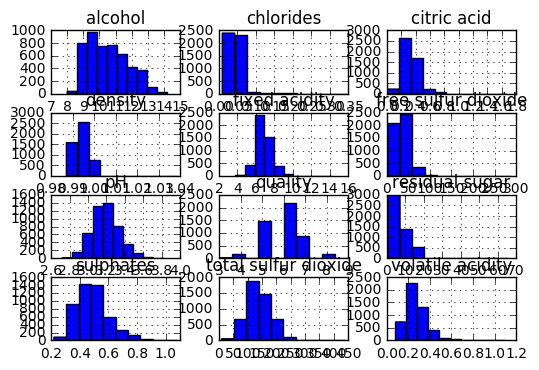

In [9]:
#data vis univ:
%matplotlib inline
data.hist()

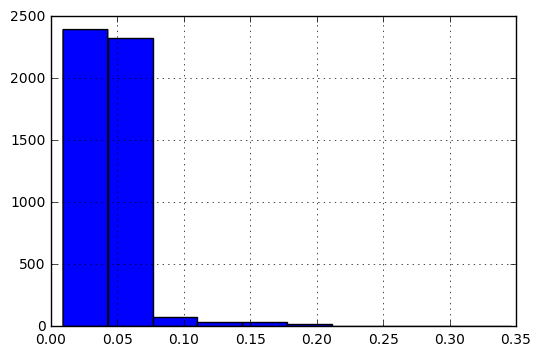

In [10]:
data.chlorides.hist()

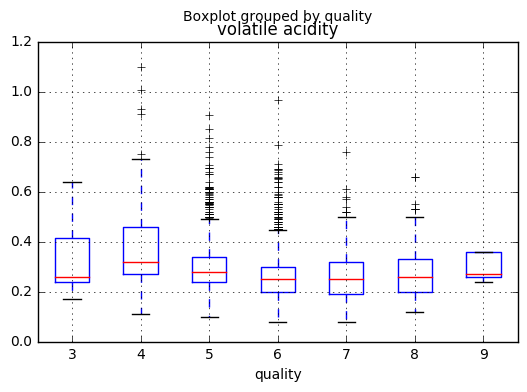

In [11]:
#stat bivarié:
from matplotlib import pyplot as plt

%matplotlib inline

data.boxplot(column=["volatile acidity"],by="quality")

In [12]:
#stat multivarié:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [19]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7BF400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001456B6A0>]], dtype=object)

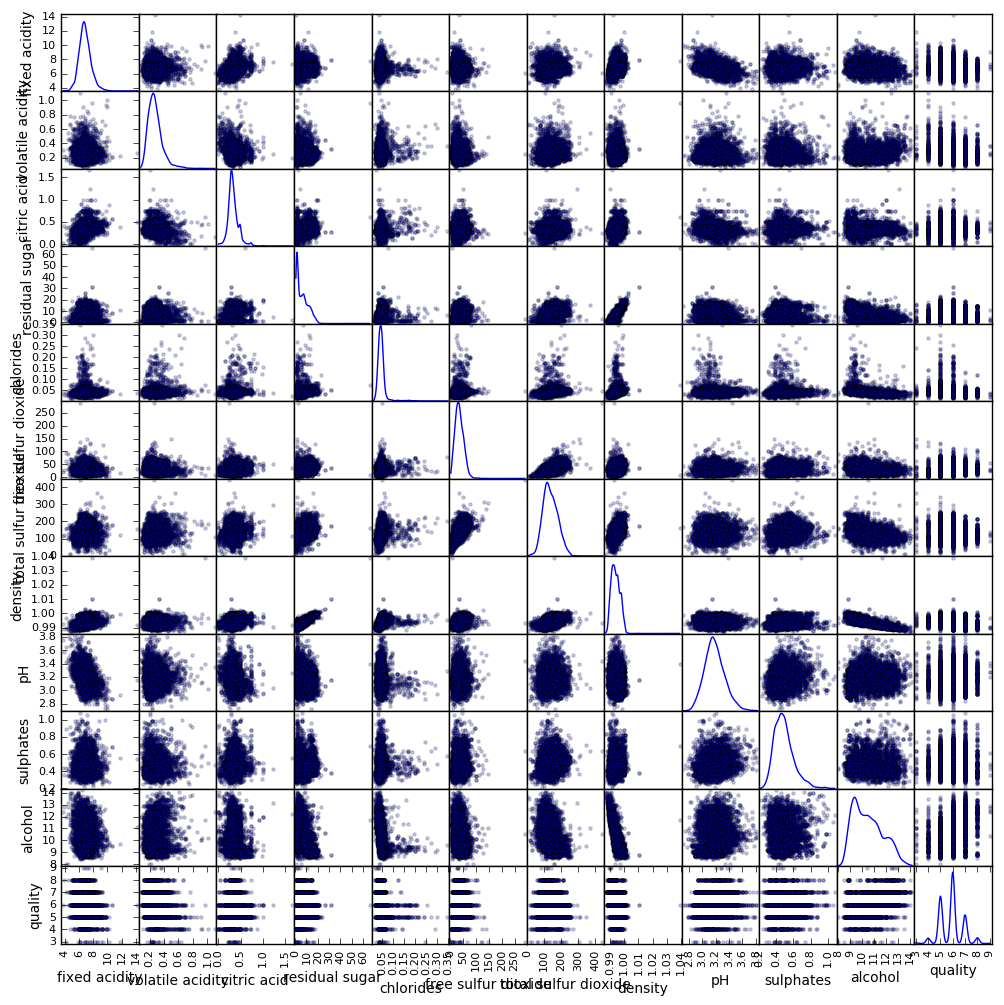

In [21]:
%matplotlib inline
scatter_matrix(data, alpha=0.2, figsize=(12,12), diagonal="kde")

In [13]:
#analyse factorielle ACP:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, n_components=2, whiten=False)

In [14]:
print(pca.explained_variance_ratio_)#inertie

[ 0.90933123  0.07931411]


In [15]:
existing_2d = pca.transform(data)#projection de notre jeu de données sur les 2 axes

In [67]:
#transform matrix to dataframe:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df_2d.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
0,-33.732172,1.240689
1,11.926072,-18.955475
2,41.224868,5.739181
3,-49.086693,-1.209751
4,-49.086693,-1.209751


In [90]:
pd.DataFrame(np.transpose(pca.components_), columns=['PC1','PC2'], index=data.columns)

,PC1,PC2
fixed acidity,-0.001545,-0.009167
volatile acidity,-0.000169,-0.001546
citric acid,-0.000339,0.000140
residual sugar,-0.047328,0.014931
chlorides,-0.000098,-0.000072
free sulfur dioxide,-0.261872,0.964638
total sulfur dioxide,-0.963853,-0.262682
density,-0.000036,-0.000018
pH,-0.000003,-0.000041
sulphates,-0.000341,-0.000361


In [83]:
def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC1"])):
		x = pc_infos["PC1"][idx]
		y = pc_infos["PC2"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

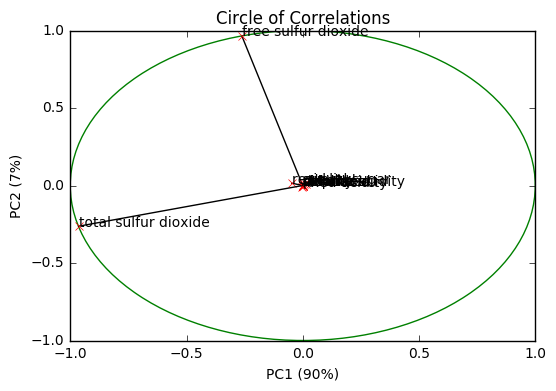

In [88]:

ebouli=pd.Series(pca.explained_variance_ratio_)
pc_infos = pd.DataFrame(np.transpose(pca.components_), columns=['PC1','PC2'], index=data.columns)
circleOfCorrelations(pc_infos, ebouli)
#circleOfCorrelations(pd.DataFrame(np.transpose(pca.components_), columns=['PC1','PC2'], index=data.columns) ,pd.Series(pca.explained_variance_ratio_))

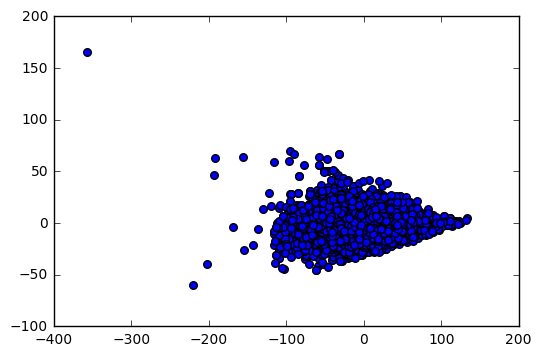

In [16]:
plt.scatter(existing_2d[:,0], existing_2d[:,1], 30,)
plt.show()

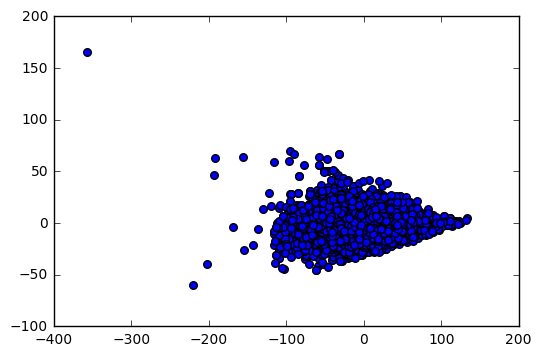

In [38]:
plt.scatter(existing_2d[:,0], existing_2d[:,1], 30)
plt.show()

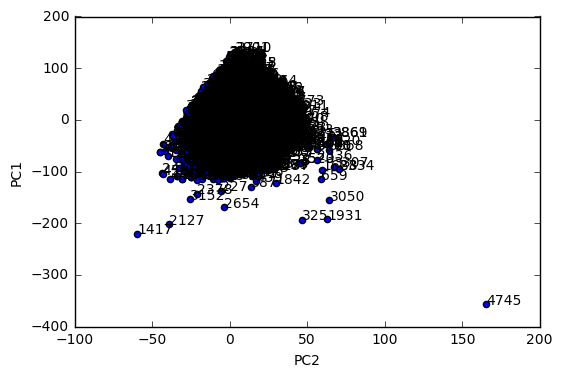

In [50]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1')
    
for i, country in enumerate(existing_df_2d.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )